In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier 

# First Question

In [124]:
bank =pd.read_csv('bank-full.csv',sep=';')
bank_temp=bank.drop('y',axis=1)
bank_dummies=pd.get_dummies(bank_temp)
bank_dummies['y']=bank['y']
train,test =train_test_split(bank_dummies,test_size=0.3,random_state=100)
train_y =train['y']
test_y = test['y']
train_x=train.drop('y',axis=1)
test_x=test.drop('y',axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaled = pd.DataFrame(scaler.transform(train_x),columns=train_x.columns)
test_x_scaled=pd.DataFrame(scaler.transform(test_x),columns=test_x.columns)

In [125]:
model = DecisionTreeClassifier(random_state=100)
model.fit(train_x,train_y)
test_pred = model.predict(test_x)
df_pred = pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred['pred_status']=df_pred['actual'] ==df_pred['predicted']
dt_accuracy=df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100
dt_accuracy

87.72485992332645

In [126]:
tp =df_pred[(df_pred['predicted']=='yes') &(df_pred['actual']=='yes')].shape[0]
tn =df_pred[(df_pred['predicted']=='no') &(df_pred['actual']=='no')].shape[0]
fp =df_pred[(df_pred['predicted']=='yes') &(df_pred['actual']=='no')].shape[0]
fn=df_pred[(df_pred['predicted']=='no') &(df_pred['actual']=='yes')].shape[0]
print("true positive:%d" %tp)
print("true negative:%d" %tn)
print("false positive:%d" %fp)
print("false negative:%d" %fn)

true positive:775
true negative:11124
false positive:861
false negative:804


In [127]:
dt_sensitivity = (tp/(tp+fn)) *100
dt_sensitivity

49.08169727675744

In [128]:
dt_specificity = (tn/(tn+fp)) *100
dt_specificity

92.81602002503129

In [129]:
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(train_x,train_y)
test_pred = model_rf.predict(test_x)
df_pred_rf= pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred_rf['pred_status']=df_pred_rf['actual'] ==df_pred_rf['predicted']
rf_accuracy =df_pred_rf[df_pred_rf['pred_status']==True].shape[0] / df_pred_rf.shape[0] *100
rf_accuracy

89.97345915659098

In [130]:
tp_rf =df_pred_rf[(df_pred_rf['predicted']=='yes') &(df_pred_rf['actual']=='yes')].shape[0]
tn_rf =df_pred_rf[(df_pred_rf['predicted']=='no') &(df_pred_rf['actual']=='no')].shape[0]
fp_rf =df_pred_rf[(df_pred_rf['predicted']=='yes') &(df_pred_rf['actual']=='no')].shape[0]
fn_rf=df_pred_rf[(df_pred_rf['predicted']=='no') &(df_pred_rf['actual']=='yes')].shape[0]
print("true positive:%d" %tp_rf)
print("true negative:%d" %tn_rf)
print("false positive:%d" %fp_rf)
print("false negative:%d" %fn_rf)

true positive:561
true negative:11643
false positive:342
false negative:1018


In [131]:
rf_sensitivity = (tp_rf/(tp_rf+fn_rf)) *100
rf_sensitivity

35.52881570614313

In [132]:
rf_specificity = (tn_rf/(tn_rf+fp_rf)) *100
rf_specificity

97.14643304130163

In [133]:
model_ab = AdaBoostClassifier(random_state=100)
model_ab.fit(train_x,train_y)

test_pred =model_ab.predict(test_x)
df_pred_ab= pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred_ab['pred_status']=df_pred_ab['actual'] ==df_pred_ab['predicted']
ab_accuracy =df_pred_ab[df_pred_ab['pred_status']==True].shape[0] / df_pred_ab.shape[0] *100
ab_accuracy


89.72279563550575

In [134]:
tn_ab,fp_ab,fn_ab,tp_ab = confusion_matrix(df_pred_ab['actual'],df_pred_ab['predicted']).ravel()
tn_ab,fp_ab,fn_ab,tp_ab

(11585, 400, 994, 585)

In [135]:
ab_sensitivity =tp_ab/(tp_ab+fn_ab)  * 100

In [136]:
ab_specificity =tn_ab/(tn_ab+fp_ab) *100

In [137]:
model_knn = KNeighborsClassifier()
model_knn.fit(train_x_scaled,train_y)
test_pred = model_knn.predict(test_x_scaled)
df_pred_knn = pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred_knn['pred_status'] = df_pred_knn['actual'] == df_pred_knn['predicted']
knn_accuracy=df_pred_knn['pred_status'].sum()/df_pred_knn.shape[0] *100
knn_accuracy

89.28782070185785

In [138]:
tn_knn,fp_knn,fn_knn,tp_knn = confusion_matrix(df_pred_knn['actual'],df_pred_knn['predicted']).ravel()
tn_knn,fp_knn,fn_knn,tp_knn

(11590, 395, 1058, 521)

In [139]:
knn_sensitivity = tp_knn/(tp_knn+fn_knn)*100
knn_specificity = tn_knn/(tn_knn+fp_knn)*100

In [140]:
model_dict={"Decision_Tree":pd.Series([dt_accuracy,dt_sensitivity,dt_specificity,tp,tn,fp,fn]),
            "Random_Forest":pd.Series([rf_accuracy,rf_sensitivity,rf_specificity,tp_rf,tn_rf,fp_rf,fn_rf]),
             "Adaptive Boosting":pd.Series([ab_accuracy,ab_sensitivity,ab_specificity,tp_ab,tn_ab,fp_ab,fn_ab]),
             "Knn Algorithm":pd.Series([knn_accuracy,knn_sensitivity,knn_specificity,tp_knn,tn_knn,fp_knn,fn_knn])}
model_df = pd.DataFrame(model_dict)
model_df.index=["Accuracy","Sensitivity","Specificity","tp","fn","fp","fn"]
print(model_df)

             Adaptive Boosting  Decision_Tree  Knn Algorithm  Random_Forest
Accuracy             89.722796      87.724860      89.287821      89.973459
Sensitivity          37.048765      49.081697      32.995567      35.528816
Specificity          96.662495      92.816020      96.704214      97.146433
tp                  585.000000     775.000000     521.000000     561.000000
fn                11585.000000   11124.000000   11590.000000   11643.000000
fp                  400.000000     861.000000     395.000000     342.000000
fn                  994.000000     804.000000    1058.000000    1018.000000


# Second Question

In [172]:
from sklearn.metrics.pairwise import euclidean_distances

In [173]:
iris = pd.read_csv('iris.csv')

In [105]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [174]:
train,test =train_test_split(iris,test_size=0.3,random_state=100)
train_y =train['Species']
test_y = test['Species']
train_x=train.drop('Species',axis=1)
test_x=test.drop('Species',axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaled = pd.DataFrame(scaler.transform(train_x),columns=train_x.columns)
test_x_scaled=pd.DataFrame(scaler.transform(test_x),columns=test_x.columns)

In [179]:
df_knn = pd.DataFrame(euclidean_distances(test_x_scaled.head(1),train_x_scaled).flatten(),index=train_x.index,columns=['ed'])
value=train_y.loc[df_knn.sort_values('ed').head().index].value_counts().head(1).index.tolist()[0]
print(value)

virginica


# Third Question

- https://www.kaggle.com/ravindravenkat/digitrecogniserravindra

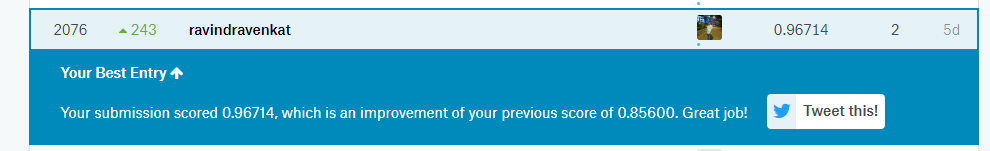

In [122]:
from IPython.display import Image
Image(filename='kagglefinal.png')